# Grid parameters
In this notebook you can investigate at the grid parameters of a classification version.

In [ ]:
import warnings
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../../..")) # Determine the project's root directory
sys.path.append(PROJECT_ROOT) # Add the project root directory to Python's module search path.


from src.classification.database_communication.DatabaseCommunication import DatabaseCommunication
from plotting.plot_networks import *

warnings.filterwarnings('ignore')

dc = DatabaseCommunication()
df_parameters_of_grids = dc.municipal_register_with_clustering_parameters_for_classification_version()

Database connection is constructed. 


Make a subselection of the parameters to plot

In [2]:
df_pairplot = df_parameters_of_grids.drop(
    ['version_id', 'plz', 'bcid', 'kcid', 'ratio', 'house_distance_km', 'no_connection_buses', 'resistance',
     'reactance', 'osm_trafo',
     'simultaneous_peak_load_mw',
     'no_household_equ',
     'max_power_mw', 'pop', 'area', 'lat', 'lon', 'ags', 'name', 'regio7', 'regio5', 'pop_den', 'filtered'], axis=1)
df_pairplot.head()

no_branches  no_house_connections  no_house_connections_per_branch   
0           18                    42                         2.333333  \
1            6                    14                         2.333333   
2           17                    50                         2.941176   
3           24                    88                         3.666667   
4            9                    18                         2.000000   

   no_households  no_households_per_branch  max_no_of_households_of_a_branch   
0            242                 13.444444                              65.0  \
1             52                  8.666667                              25.0   
2            215                 12.693395                              54.0   
3            214                  8.895738                              27.0   
4            128                 14.222222                              40.0   

   transformer_mva  max_trafo_dis  avg_trafo_dis  cable_length_km   
0             0.63       0.208748       0.151108         3.344493  \
1             0.25       0.249369       0.122459         0.930422   
2             0.63       0.295789       0.196393         4.103642   
3             0.63       0.289717       0.185763         6.034513   
4             0.40       0.291970       0.192017         2.136543   

   cable_len_per_house  vsw_per_branch  max_vsw_of_a_branch  
0             0.079631        0.286966             0.539413  
1             0.066459        0.224393             0.268053  
2             0.082073        0.307144             0.772087  
3             0.068574        0.302438             0.514505  
4             0.118697        0.331496             0.462934

all selected parameters are plotted with each other

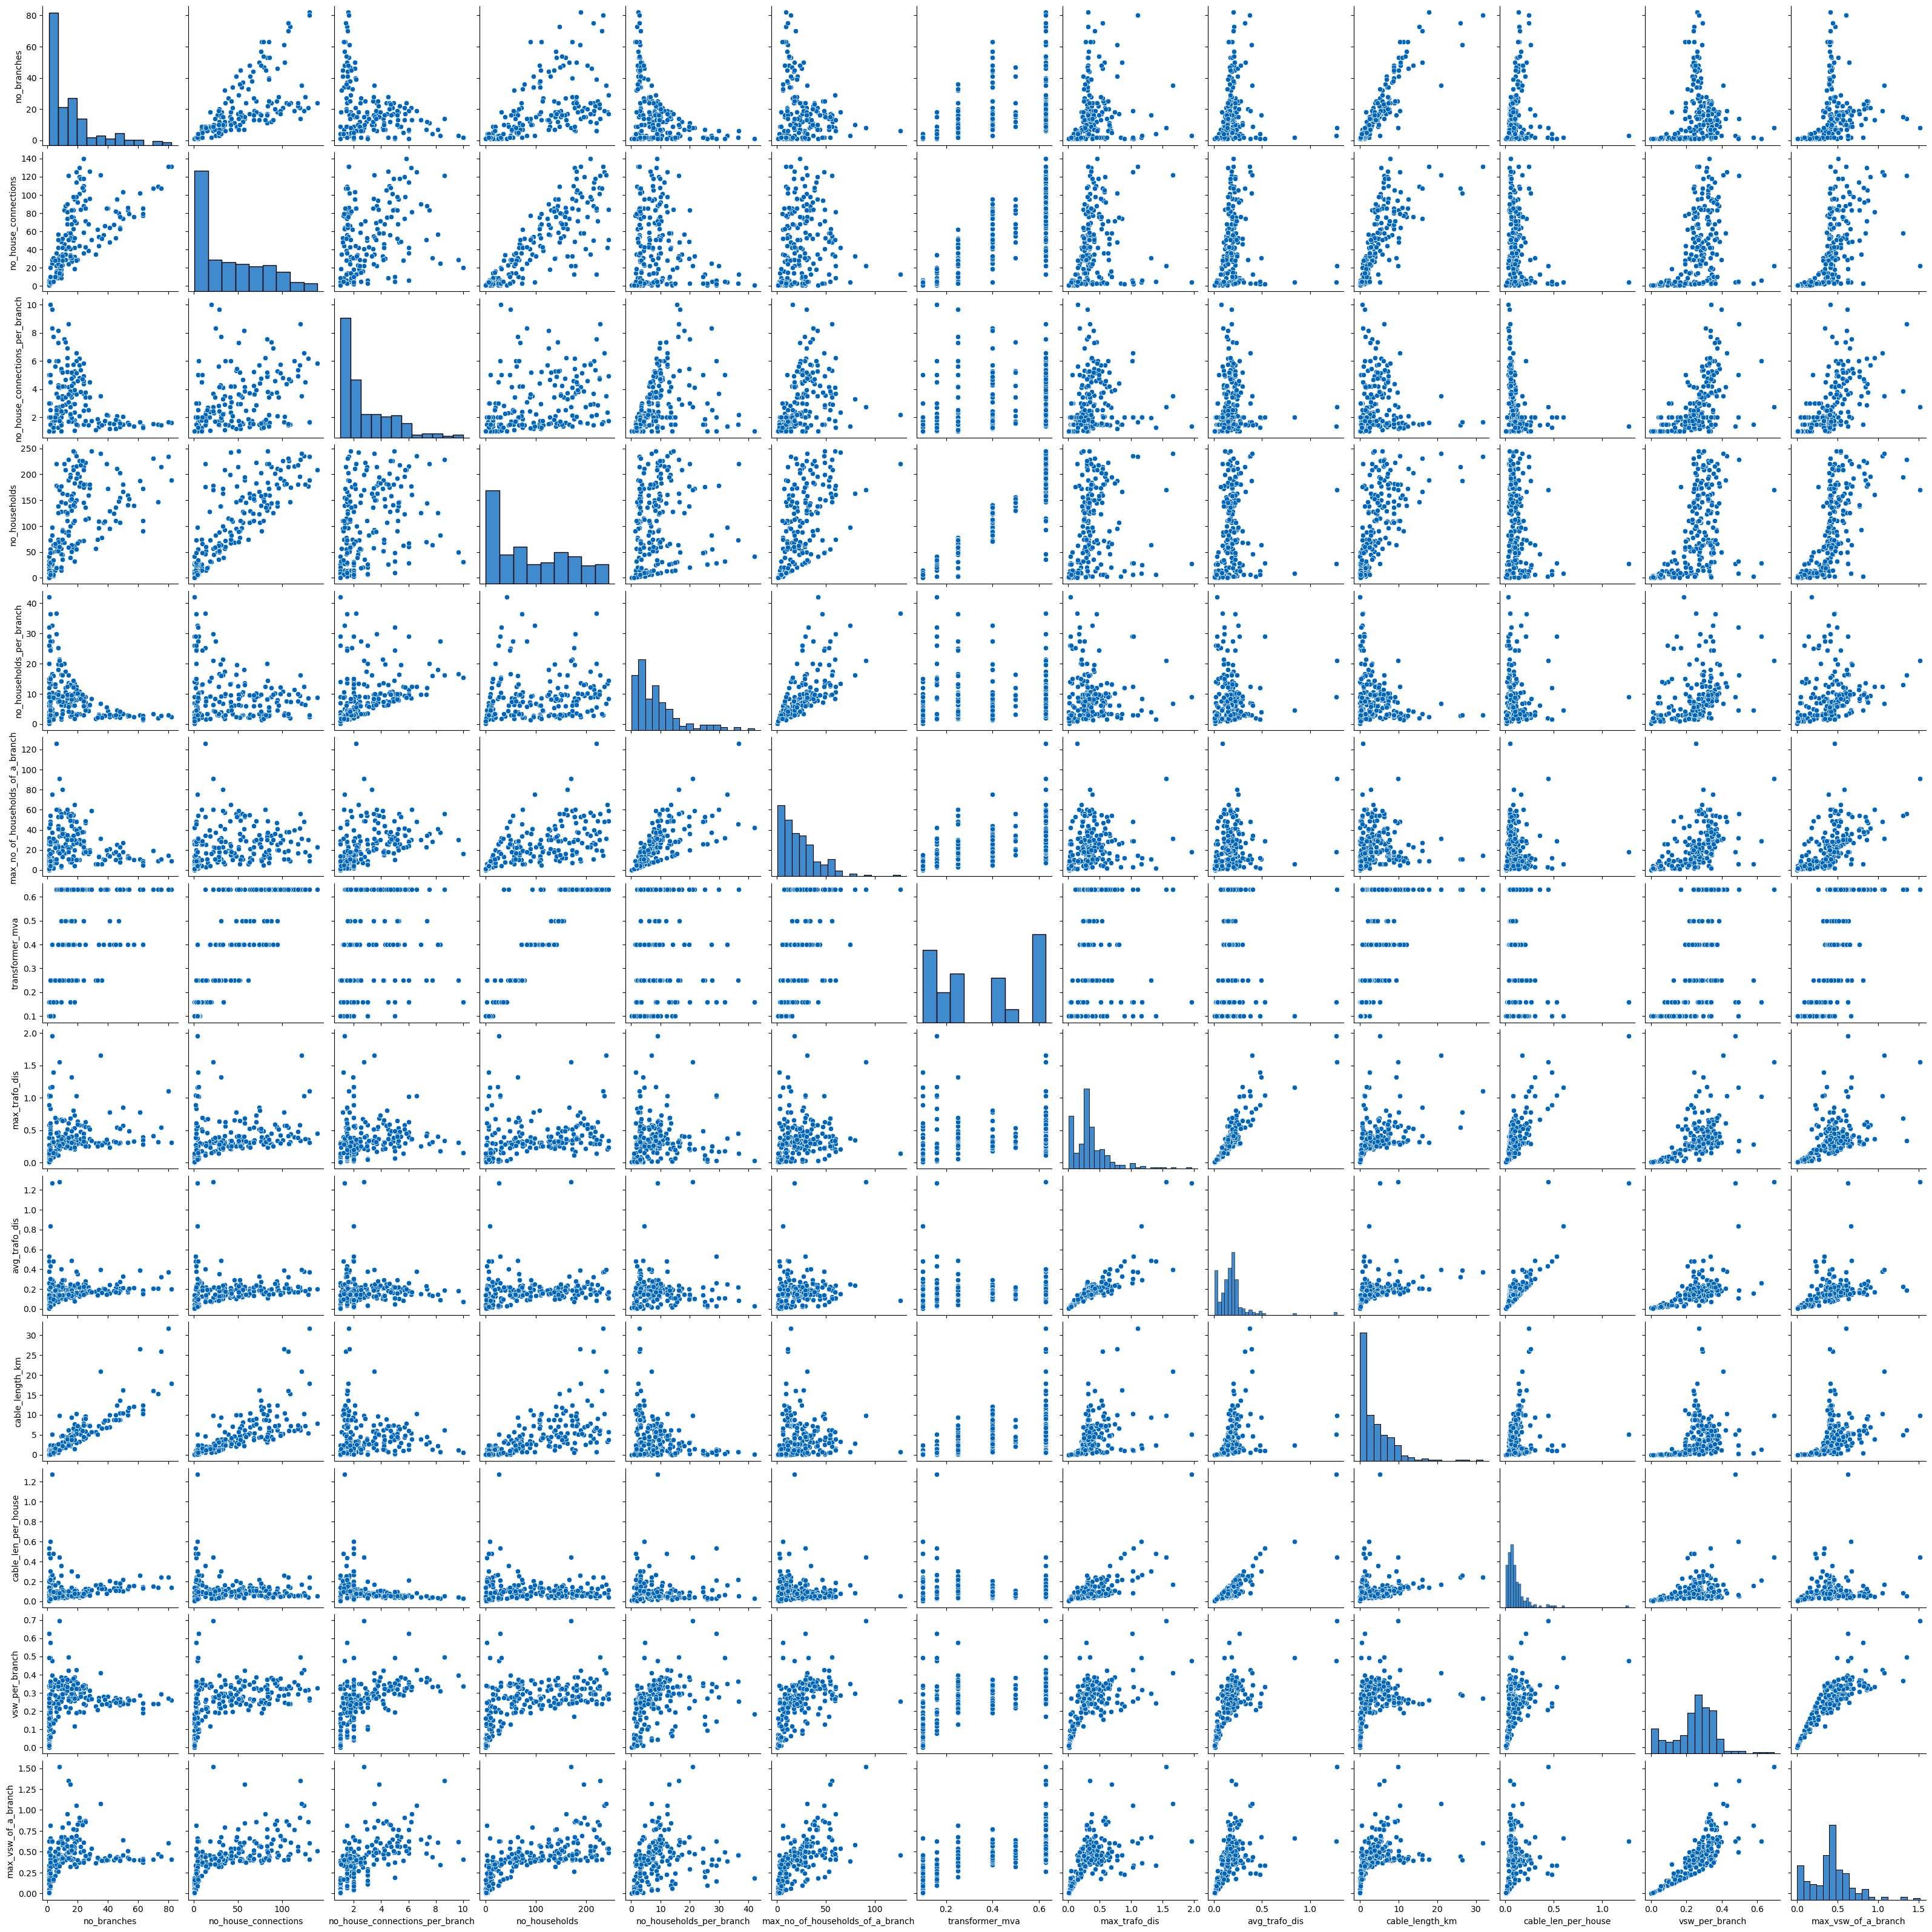

In [3]:
sns.pairplot(df_pairplot)

There is the option to sort the grids by a parameter.

In [4]:
sorted_df = df_parameters_of_grids.sort_values('cable_length_km', ascending=False)
sorted_df.head(10)

version_id    plz  kcid  bcid  no_connection_buses  no_branches   
87           1  89278     1     4                  123           80  \
88           1  89278     2     4                   98           61   
83           1  89278     1     2                  106           75   
123          1  63776     2     1                  116           35   
54           1  89278     2   -11                  125           82   
101          1  89278     1    12                   67           50   
216          1  87742     1    10                   99           70   
70           1  89278     2    -3                  107           73   
210          1  87742     1     4                   71           48   
90           1  89278     2     5                   88           46   

     no_house_connections  no_house_connections_per_branch  no_households   
87                    131                         1.637500            234  \
88                    102                         1.672131            188   
83                    107                         1.426667            214   
123                   122                         3.485714            240   
54                    131                         1.597561            189   
101                    74                         1.480000            166   
216                   107                         1.528571            231   
70                    109                         1.493151            147   
210                    76                         1.583333            203   
90                     95                         2.065217            211   

     no_household_equ  no_households_per_branch   
87         232.427284                  2.905341  \
88         186.429726                  3.056225   
83         213.333004                  2.844440   
123        240.000000                  6.857143   
54         189.000000                  2.304878   
101        166.000000                  3.320000   
216        230.294281                  3.289918   
70         147.000000                  2.013699   
210        199.110713                  4.148140   
90         209.207287                  4.547985   

     max_no_of_households_of_a_branch  house_distance_km  transformer_mva   
87                          14.144703           0.042286             0.63  \
88                          11.000000           0.042140             0.63   
83                          11.000000           0.042795             0.63   
123                         31.000000           0.039698             0.63   
54                           9.000000           0.030998             0.63   
101                         27.000000           0.037306             0.63   
216                         19.000000           0.035766             0.63   
70                           9.000000           0.032548             0.63   
210                         23.000000           0.048558             0.63   
90                          25.000000           0.036860             0.63   

     osm_trafo  max_trafo_dis  avg_trafo_dis  cable_length_km   
87       False       1.103295       0.373407        31.739742  \
88       False       0.779015       0.389314        26.482401   
83       False       0.546846       0.321298        25.863203   
123      False       1.658927       0.395051        20.883036   
54        True       0.313717       0.201901        17.863937   
101      False       0.853982       0.330576        16.136191   
216      False       0.414899       0.204501        16.089978   
70        True       0.314856       0.206772        15.301299   
210      False       0.523207       0.274836        13.664562   
90       False       0.540995       0.248367        12.422583   

     cable_len_per_house  max_power_mw  simultaneous_peak_load_mw  resistance   
87              0.242288      6.972819                   0.606827   21.649195  \
88              0.259631      5.592892                   0.618472   17.486847   
83   

In [5]:
plz, kcid, bcid = get_network_info_for_plotting(sorted_df.iloc[0])
plot_grid_on_map(plz=plz, kcid=kcid, bcid=bcid)

PgReaderWriter is constructed. 
Version: 1 (already exists)
Parameter tables are inserted
PgReaderWriter closed.
PgReaderWriter closed.


Test if geo-data are in lat/long cannot be performed using geopy -> eventual plot errors are possible.
